In [1]:
import pandas as pd


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
df=pd.read_excel("cluster_may.xlsx")


In [4]:
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,680.0,247.730882
1,Urine Routine,389.0,77.048843
2,Random Blood Sugar,387.0,38.521964
3,Renal Function Test (RFT),326.0,131.174847
4,"Electrolytes (Na,K,Cl)",304.0,433.039474
...,...,...,...
135,24 Hrs Urine Sodium,1.0,250.000000
136,Anti Smooth Muscle,1.0,1628.000000
137,Serum ACE (Angiotensin,1.0,689.000000
138,(blank),NaN,NaN


In [5]:

pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\kushal\appdata\local\programs\python\python38\lib\site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,680.0,247.730882
1,Urine Routine,389.0,77.048843
2,Random Blood Sugar,387.0,38.521964
3,Renal Function Test (RFT),326.0,131.174847
4,"Electrolytes (Na,K,Cl)",304.0,433.039474
...,...,...,...
135,24 Hrs Urine Sodium,1.0,250.000000
136,Anti Smooth Muscle,1.0,1628.000000
137,Serum ACE (Angiotensin,1.0,689.000000
138,(blank),NaN,NaN


## Plotting on scatter plot the 2 features of each test¶


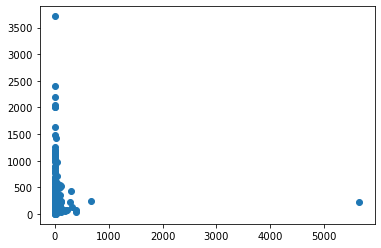

In [10]:

plt.scatter(df['Frequency'],df['Avg_revenue'])

In [11]:
scaler = MinMaxScaler()
df[['Frequency']]=scaler.fit_transform(df[['Frequency']])
df[['Avg_revenue']]=scaler.fit_transform(df[['Avg_revenue']])
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,0.120071,0.066711
1,Urine Routine,0.068612,0.020748
2,Random Blood Sugar,0.068258,0.010373
3,Renal Function Test (RFT),0.057471,0.035324
4,"Electrolytes (Na,K,Cl)",0.053581,0.116612
...,...,...,...
135,24 Hrs Urine Sodium,0.000000,0.067322
136,Anti Smooth Muscle,0.000000,0.438400
137,Serum ACE (Angiotensin,0.000000,0.185539
138,(blank),NaN,NaN


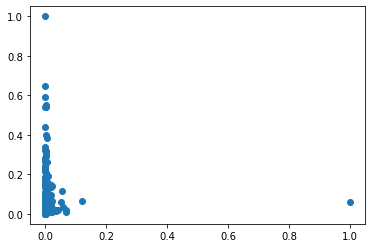

In [12]:
plt.scatter(df['Frequency'],df['Avg_revenue'])


In [15]:
df= df.drop(df.index[138])
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,0.120071,0.066711
1,Urine Routine,0.068612,0.020748
2,Random Blood Sugar,0.068258,0.010373
3,Renal Function Test (RFT),0.057471,0.035324
4,"Electrolytes (Na,K,Cl)",0.053581,0.116612
...,...,...,...
134,Anti DS DNA,0.000000,0.269288
135,24 Hrs Urine Sodium,0.000000,0.067322
136,Anti Smooth Muscle,0.000000,0.438400
137,Serum ACE (Angiotensin,0.000000,0.185539


In [22]:
df.drop(df.tail(1).index,inplace=True)
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,0.120071,0.066711
1,Urine Routine,0.068612,0.020748
2,Random Blood Sugar,0.068258,0.010373
3,Renal Function Test (RFT),0.057471,0.035324
4,"Electrolytes (Na,K,Cl)",0.053581,0.116612
...,...,...,...
133,C ANCA,0.000000,0.215430
134,Anti DS DNA,0.000000,0.269288
135,24 Hrs Urine Sodium,0.000000,0.067322
136,Anti Smooth Muscle,0.000000,0.438400


In [23]:
k_rng= range(1,11)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df[['Frequency','Avg_revenue']])
    sse.append(km.inertia_)

In [24]:
sse

[3.0150653738013866,
 1.1104678070552574,
 0.5810476245755638,
 0.33565867261849935,
 0.18065154762132818,
 0.13237464345290129,
 0.09946508903754933,
 0.08087520621412803,
 0.06313308188002567,
 0.05234109919785473]

Text(0, 0.5, 'Sum squared error')

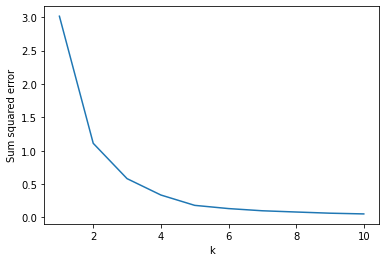

In [25]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('Sum squared error')

## K= 4 is selected as optimum value of cluster numbers using elow-joint analysis

In [36]:

km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [37]:
y_predicted= km.fit_predict(df[['Frequency','Avg_revenue']])
y_predicted

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 3, 3, 3, 2, 3, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3,
       0, 3, 3, 0, 2, 0, 0, 0, 2, 3, 3, 3, 2, 0, 2, 3, 3, 3, 0, 3, 3, 1,
       3, 0, 0, 3, 0, 2, 1, 3, 0, 3, 2, 2, 1, 3, 3, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 3, 3, 2, 2, 0, 3, 3, 0, 3, 2, 0, 3, 0, 3, 0, 1,
       3, 3, 2, 0, 2, 3])

In [38]:
df['cluster']=y_predicted
df


,Test,Frequency,Avg_revenue,cluster
0,Complete Blood Count,0.120071,0.066711,0
1,Urine Routine,0.068612,0.020748,0
2,Random Blood Sugar,0.068258,0.010373,0
3,Renal Function Test (RFT),0.057471,0.035324,0
4,"Electrolytes (Na,K,Cl)",0.053581,0.116612,3
...,...,...,...,...
133,C ANCA,0.000000,0.215430,3
134,Anti DS DNA,0.000000,0.269288,2
135,24 Hrs Urine Sodium,0.000000,0.067322,0
136,Anti Smooth Muscle,0.000000,0.438400,2


In [39]:
df0= df[df['cluster']==0]
df1= df[df['cluster']==1]
df2= df[df['cluster']==2]
df3= df[df['cluster']==3]

In [40]:
df0

,Test,Frequency,Avg_revenue,cluster
0,Complete Blood Count,0.120071,0.066711,0
1,Urine Routine,0.068612,0.020748,0
2,Random Blood Sugar,0.068258,0.010373,0
3,Renal Function Test (RFT),0.057471,0.035324,0
5,Thyroid Stimulating,0.050752,0.062550,0
...,...,...,...,...
123,BUN,0.000000,0.032315,0
126,Absolute Eosinophil Count,0.000000,0.040393,0
128,Urine Protien Creatinine,0.000000,0.000000,0
130,Bicarbonate,0.000000,0.058166,0


In [41]:
df1

,Test,Frequency,Avg_revenue,cluster
87,Vitamin B12,0.000354,0.549347,1
94,Double Marker For Downs,0.000354,0.538575,1
100,QUADRUPLE MARKER,0.000177,0.646291,1
104,ANA Profile,0.000177,1.000000,1
111,Anti CCP- (Cyclic,0.000000,0.538575,1
131,Triple Marker,0.000000,0.592433,1


In [42]:
df2

,Test,Frequency,Avg_revenue,cluster
30,"Troponin I (High Sensitive,",0.006366,0.263705,2
38,Biopsy Histopathology,0.003890,0.382939,2
70,CA 125,0.000707,0.298963,2
74,Para Thyroid Hormone,0.000531,0.316346,2
78,Iron Profile,0.000531,0.308267,2
80,FT3 - FT4 - TSH,0.000354,0.290831,2
93,Vitamin D 25 Hydroxy (D3),0.000354,0.398995,2
98,Anti Nuclear Antibody,0.000177,0.269288,2
99,Folic Acid,0.000177,0.285176,2
105,Carcino Embryonic,0.000177,0.233338,2


In [43]:
df3

,Test,Frequency,Avg_revenue,cluster
4,"Electrolytes (Na,K,Cl)",0.053581,0.116612,3
10,Liver Function Test (LFT),0.021574,0.139922,3
16,HIV 1 & 2 Rapid,0.017683,0.093608,3
17,HbA1C / Glycosylated,0.017330,0.133915,3
18,ABG (Arterial Blood Gas),0.017153,0.147820,3
22,Urine Culture,0.012909,0.131070,3
27,Blood Culture,0.008134,0.194116,3
29,Dengue IgG IgM NS1,0.007250,0.154417,3
35,Typhoid IgM (Rapid),0.004067,0.090312,3
36,Thyroid Function Test,0.004067,0.138751,3


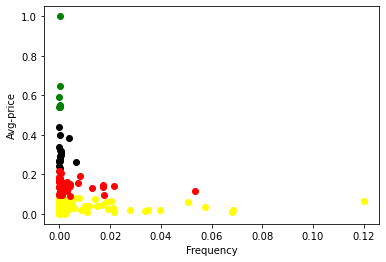

<Figure size 1440x1080 with 0 Axes>

In [44]:

plt.scatter(df0['Frequency'],df0['Avg_revenue'],color='yellow')
plt.scatter(df1['Frequency'],df1['Avg_revenue'],color='green')
plt.scatter(df2['Frequency'],df2['Avg_revenue'],color='black')
plt.scatter(df3['Frequency'],df3['Avg_revenue'],color='red')

plt.xlabel('Frequency')
plt.ylabel('Avg-price')
fig= plt.figure(figsize=(20,15))
plt.show()